In [95]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## generate clean X and y where y_i = sin(x_i)
X = np.linspace(start=0, stop=3.14*2, num=5000).reshape(-1, 1)
y = np.squeeze(np.sin(X))

## create training data with n3 points
rng = np.random.RandomState(4)
training_indices_n3 = rng.choice(np.arange(y.size), size=1250, replace=False)
X_train_n3, y_train_n3 = X[training_indices_n3], y[training_indices_n3]

noise_std = .1
y_train_n3 = y_train_n3 + rng.normal(loc=0.0, scale=noise_std, size=y_train_n3.shape)



In [97]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.0


In [98]:
# X_normalizer = layers.Normalization(input_shape=[1,], axis=None)
# X_normalizer.adapt(X_train_n3)

In [99]:
X_model_single = tf.keras.Sequential()
X_model_single.add(layers.Dense(units = 100, activation='relu', input_shape=(1,)))
X_model_single.add(layers.Dense(1))
X_model_single.summary()

# X_model_single = tf.keras.Sequential()
# X_model_single = tf.keras.Sequential([
#     X_normalizer,
# ])

# X_model_single = tf.keras.Sequential()

# X_model_single.add(layers.Dense(16, activation='relu',input_shape=(1,)))
# X_model_single.add(layers.Dense(16,activation='relu'))
# X_model_single.add(layers.Dense(1))

X_model_single.compile(
    optimizer='rmsprop',loss='mse',metrics='mae')

# X_model_single.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
#     loss='mean_absolute_error')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 100)               200       
                                                                 
 dense_46 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
X_model_multiple = tf.keras.Sequential()

X_model_multiple.add(layers.Dense(16, activation='relu',input_shape=(1,)))
X_model_multiple.add(layers.Dense(16,activation='relu'))
X_model_multiple.add(layers.Dense(16))
X_model_multiple.add(layers.Dense(16))
X_model_multiple.add(layers.Dense(16))
X_model_multiple.add(layers.Dense(16))
X_model_multiple.add(layers.Dense(16))
X_model_multiple.add(layers.Dense(16))
X_model_multiple.add(layers.Dense(16))
X_model_multiple.add(layers.Dense(16))

X_model_multiple.add(layers.Dense(1))

X_model_multiple.compile(
    optimizer='rmsprop',loss='mse',metrics='mae')

In [101]:
%%time
history_single = X_model_single.fit(
    X_train_n3,
    y_train_n3,
    batch_size=16,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 0.3721 - mae: 0.5284 - val_loss: 0.2818 - val_mae: 0.4552
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2640 - mae: 0.4475 - val_loss: 0.2126 - val_mae: 0.3967
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2037 - mae: 0.3930 - val_loss: 0.1742 - val_mae: 0.3560
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1857 - mae: 0.3741 - val_loss: 0.1666 - val_mae: 0.3436
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1786 - mae: 0.3621 - val_loss: 0.1803 - val_mae: 0.3469
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1749 - mae: 0.3555 - val_loss: 0.1673 - val_mae: 0.3353
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1713 - mae: 0.3485 - val_loss: 0.1679 - val_mae: 0.3337
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1707 - m

In [102]:
%%time
history_multiple = X_model_multiple.fit(
    X_train_n3,
    y_train_n3,
    batch_size=16,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 0.2726 - mae: 0.4460 - val_loss: 0.1985 - val_mae: 0.3787
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2201 - mae: 0.4041 - val_loss: 0.2091 - val_mae: 0.3828
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2072 - mae: 0.3888 - val_loss: 0.1813 - val_mae: 0.3643
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.2003 - mae: 0.3796 - val_loss: 0.2164 - val_mae: 0.3820
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 0.1912 - mae: 0.3684 - val_loss: 0.1716 - val_mae: 0.3483
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1890 - mae: 0.3638 - val_loss: 0.3643 - val_mae: 0.4378
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1924 - mae: 0.3646 - val_loss: 0.2037 - val_mae: 0.3654
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1813 - m

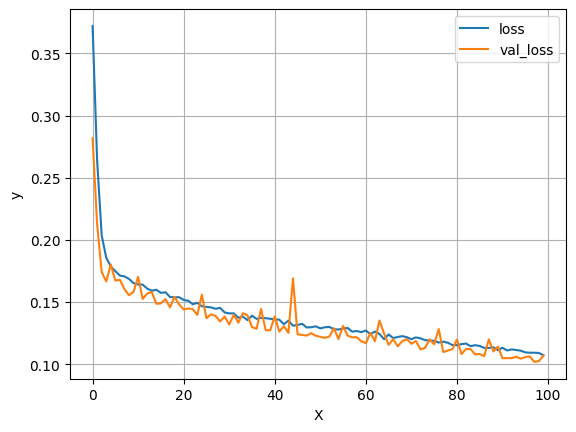

In [103]:
plt.plot(history_single.history['loss'], label='loss')
plt.plot(history_single.history['val_loss'], label='val_loss')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

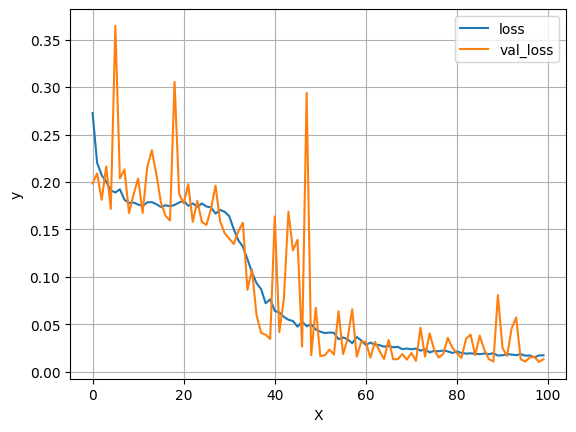

In [104]:
plt.plot(history_multiple.history['loss'], label='loss')
plt.plot(history_multiple.history['val_loss'], label='val_loss')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)

40/40 [==============================] - 0s 2ms/step


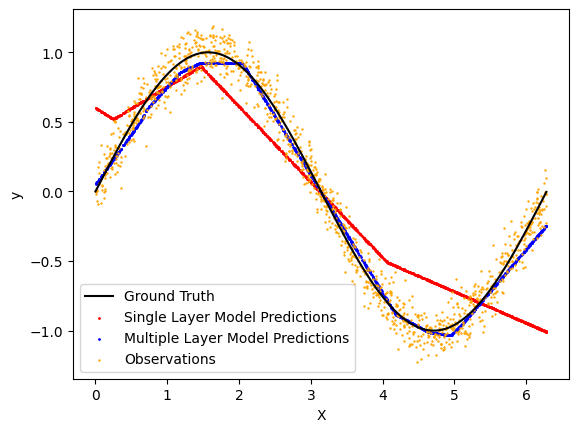

In [120]:
y_single = X_model_single.predict(X_train_n3)
y_multiple = X_model_multiple.predict(X_train_n3)

plt.plot(X,y, color="k", label ="Ground Truth")

plt.scatter(X_train_n3, y_single, color='red', label='Single Layer Model Predictions',s=1)
plt.scatter(X_train_n3, y_multiple, color='blue', label='Multiple Layer Model Predictions',s=1)

plt.scatter(X_train_n3,y_train_n3,color='orange', label='Observations',s=.5)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()